# Xarray Guide

- xarray is a useful tool for parallelizing and working with large datasets in the geosciences


- xarray has 2 fundamental datastructures:
    - DataArrays, which hold single multi-dimensional variables and its coordinates
    - DataSets, which hold multiple variables that potentially share the same coordinates
    

DataArrays have four essential attributes:
 - values: a numpy.ndarray holding the array's values
 - dims: dimsnsion names for each axis (e.g. ('x', 'y', 'z') or ('lat', 'lon', 'time'))
 - coords: a dictionary-esque array of coordinates associated with a dimension (all lat values on the grid)
 - attrs: an Ordered Dictionary to hold arbitrary attributes/metadata (such as units)
 
 
 
 
1st) We will build an arbitrary DataArray to work through its components.

2nd) We will but this understanding into practice by demonstrate opening data files at DataSets in xarray.
 - The data for this demonstration can be found in /NCAR-pangeo-tutorial/data/

## Constructing a Simple Xarray DataArray

In [5]:
#Import necessary modules
import xarray as xr #Load xarray module
from matplotlib import pyplot as plt #Load plotting module
%matplotlib inline 

This is how to construct the simplest form of a DataArray - just values:

In [6]:
da = xr.DataArray([0, 1, 2, 1, 0])
da

<xarray.DataArray (dim_0: 5)>
array([0, 1, 2, 1, 0])
Dimensions without coordinates: dim_0

This is how to construct a DataArray with values AND a dimension:

In [7]:
da = xr.DataArray([0, 1, 2, 1, 0], dims=['lat'])
da

<xarray.DataArray (lat: 5)>
array([0, 1, 2, 1, 0])
Dimensions without coordinates: lat

Next we construct a DataArray with coordinate values:

In [8]:
da = xr.DataArray([0, 1, 2, 1, 0],
                  dims = ['lat'],
                  coords = {'lat': [10, 20, 30, 40, 50]})
da

<xarray.DataArray (lat: 5)>
array([0, 1, 2, 1, 0])
Coordinates:
  * lat      (lat) int64 10 20 30 40 50

We can mirror this syntax to add attributes, or we can use this method to add attributes to an existing DataArray:

In [11]:
da.attrs['units'] = 'arbitrary units'
da

<xarray.DataArray (lat: 5)>
array([0, 1, 2, 1, 0])
Coordinates:
  * lat      (lat) int64 10 20 30 40 50
Attributes:
    units:    arbitrary units

Xarray has built-in plotting for DataArrays:

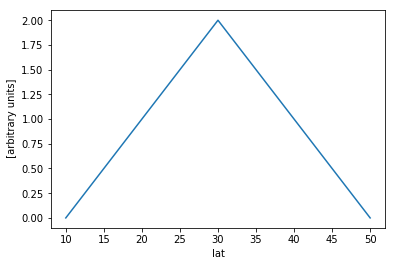

In [12]:
da.plot()

Now that we've gone through the basics of a DataArray, we can look at a DataSet (which may hold many DataArrays)

## Reading a data file with xarray as a DataSet

In [14]:
path = '../../Data/'
file = 'thetao_Omon_historical_GISS-E2-1-G_r1i1p1f1_gn_185001-187012.nc' 

ds = xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lev: 40, lon: 288, time: 252)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 1870-12-16 12:00:00
  * lev        (lev) float64 5.0 16.0 29.0 ... 4.453e+03 4.675e+03 4.897e+03
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lev_bnds   (lev, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    thetao     (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                Kenneth Lo (cdkkl@giss.nasa.gov)
    creation_date:          2018-08-27T13:51:30Z
    data_specs_version:     01.00.23
  

You can choose to 'chunk' your data, to decide how it is distributed across nodes in the super computer:

In [16]:
ds = xr.open_dataset(path+file,chunks={'time':10})

Good chunking minimizes communication across nodes, so for example, do not chunk in 'time' if you plan to take a temporal average of your data.

A general rule of thumb on chunk size is _________.

## Isolating Variable or Coordinate Data from xarray DataSet

In [17]:
thetao = ds.variables['thetao'] #Potential Temperature
thetao

<xarray.Variable (time: 252, lev: 40, lat: 180, lon: 288)>
dask.array<shape=(252, 40, 180, 288), dtype=float32, chunksize=(10, 40, 180, 288)>
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Sea Water Potential Temperature
    comment:        Diagnostic should be contributed even for models using co...
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello
    history:        2018-08-27T13:51:26Z altered by CMOR: replaced missing va...

In [18]:
lat = ds.coords['lat'] #Latitude
lat

<xarray.DataArray 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5

## Reductions on xarray DataSet

 - Maybe we only want the first time step out of the series.
 - Maybe we want to take a zonal average of the DataSet
 
 
 There are two main methods for selecting data from a DataSet
         - Typical numpy array notation
         - isel method

In [23]:
thetao_time0 = thetao[0,:,:,:]
thetao_time0

<xarray.Variable (lev: 40, lat: 180, lon: 288)>
dask.array<shape=(40, 180, 288), dtype=float32, chunksize=(40, 180, 288)>
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Sea Water Potential Temperature
    comment:        Diagnostic should be contributed even for models using co...
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello
    history:        2018-08-27T13:51:26Z altered by CMOR: replaced missing va...

In [24]:
thetao_time0_v2 = thetao.isel(time=0)
thetao_time0_v2

<xarray.Variable (lev: 40, lat: 180, lon: 288)>
dask.array<shape=(40, 180, 288), dtype=float32, chunksize=(40, 180, 288)>
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Sea Water Potential Temperature
    comment:        Diagnostic should be contributed even for models using co...
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello
    history:        2018-08-27T13:51:26Z altered by CMOR: replaced missing va...

There are two main methods for averaging data across a selected DataSet dimension
        - Specifying the axis index
        - Specifying the dimension name

In [26]:
thetao_zonal_av = thetao.mean(axis=2)
thetao_zonal_av

<xarray.Variable (time: 252, lev: 40, lon: 288)>
dask.array<shape=(252, 40, 288), dtype=float32, chunksize=(10, 40, 288)>

In [27]:
thetao_zonal_av_v2 = thetao.mean(dim = 'lon')
thetao_zonal_av_v2

<xarray.Variable (time: 252, lev: 40, lat: 180)>
dask.array<shape=(252, 40, 180), dtype=float32, chunksize=(10, 40, 180)>

## Computation on an xarray DataSet

Coordinates are preserved, but metadata is not.

Here we do a simple conversion from thetao in Celsius to Kelvin, but only for the first timestep and shallowest depth.

In [43]:
thetao_Kelvin = ds.thetao[0,0,:,:] + 273.15
thetao_Kelvin.attrs['units'] = 'degK'
thetao_Kelvin

<xarray.DataArray 'thetao' (lat: 180, lon: 288)>
dask.array<shape=(180, 288), dtype=float32, chunksize=(180, 288)>
Coordinates:
    time     object 1850-01-16 12:00:00
    lev      float64 5.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
Attributes:
    units:    degK

For 2-dimsnional data the xarray plot method automatically does a QuadMesh contour plot informed by the metadata.

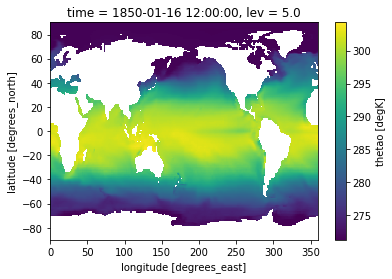

In [46]:
thetao_Kelvin.plot()

## Saving an xarray DataSet

In [49]:
thetao_Kelvin.to_netcdf(path='test_save.nc',mode='w',format='NETCDF4')

Close any open DataSets that are not in use

In [50]:
xr.Dataset.close(ds)